# Notebook to measure the frequency reponse of a system based on a self-sensing VCA

## Generate frequency sweep signal

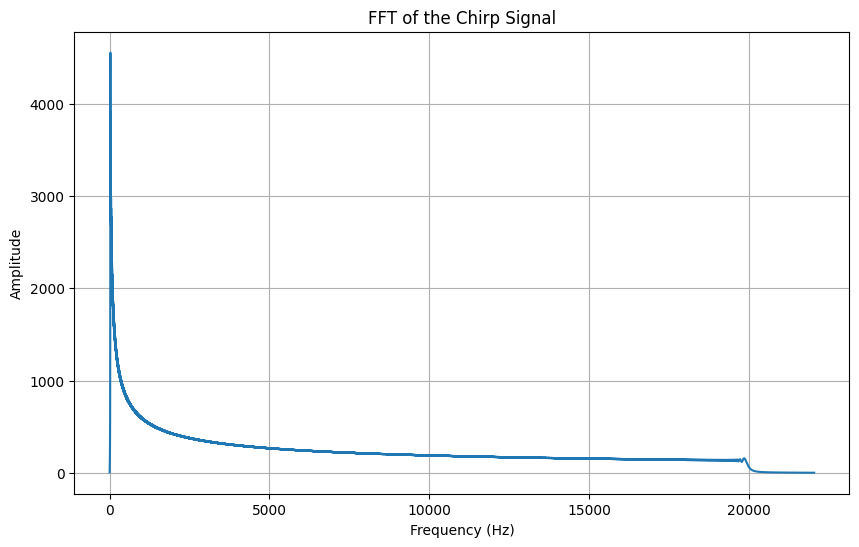

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, welch
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write


fs = 44100  # Sample rate
T = 5.0   # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)

input_signal = chirp(t, f0=20, f1=20000, t1=T, method='logarithmic')
input_signal_fft = fft(input_signal)
frequencies = fftfreq(len(input_signal), 1/fs)

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(input_signal_fft)[:len(frequencies)//2])
plt.title('FFT of the Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Convert the signal to 32-bit float
input_signal_32bit = np.float32(input_signal)
write('sweep_signal.wav', fs, input_signal_32bit)


## Visualize response

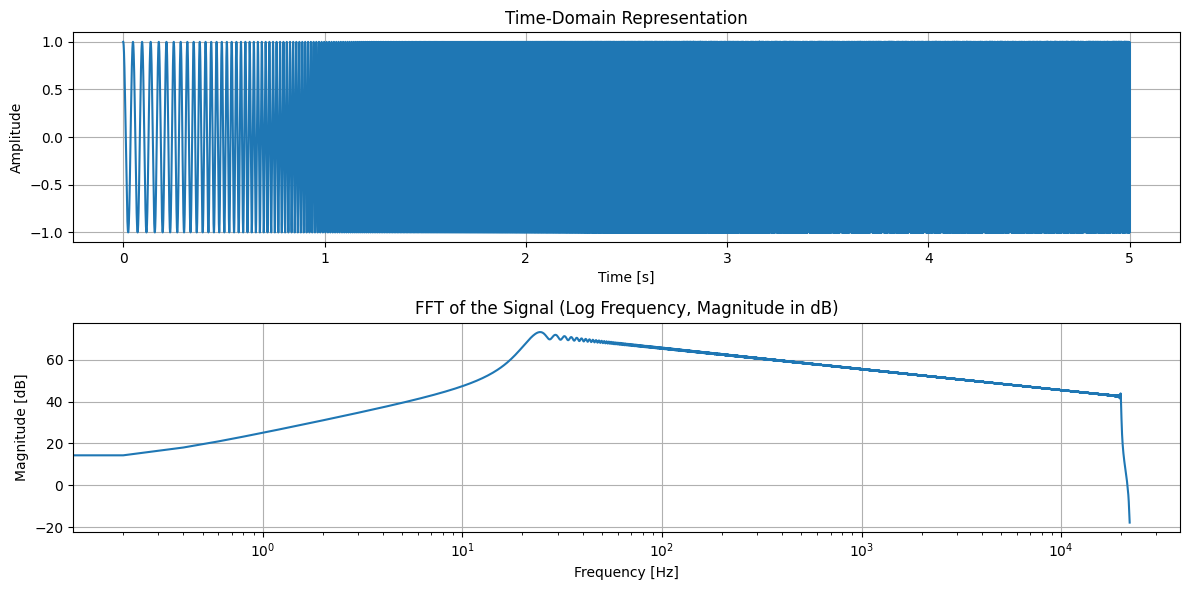

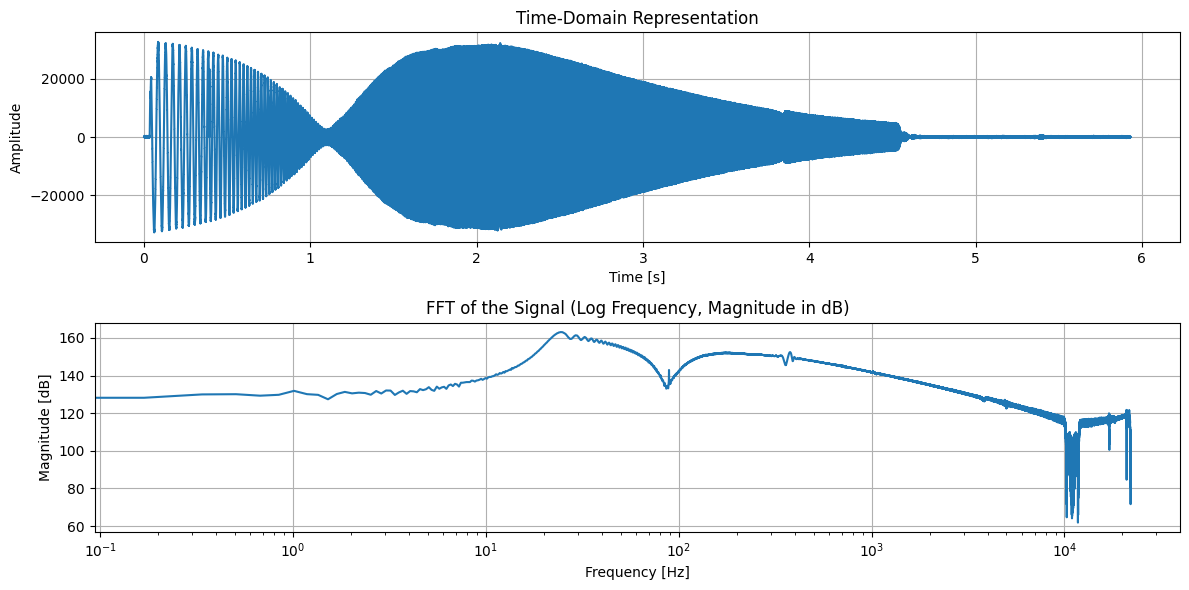

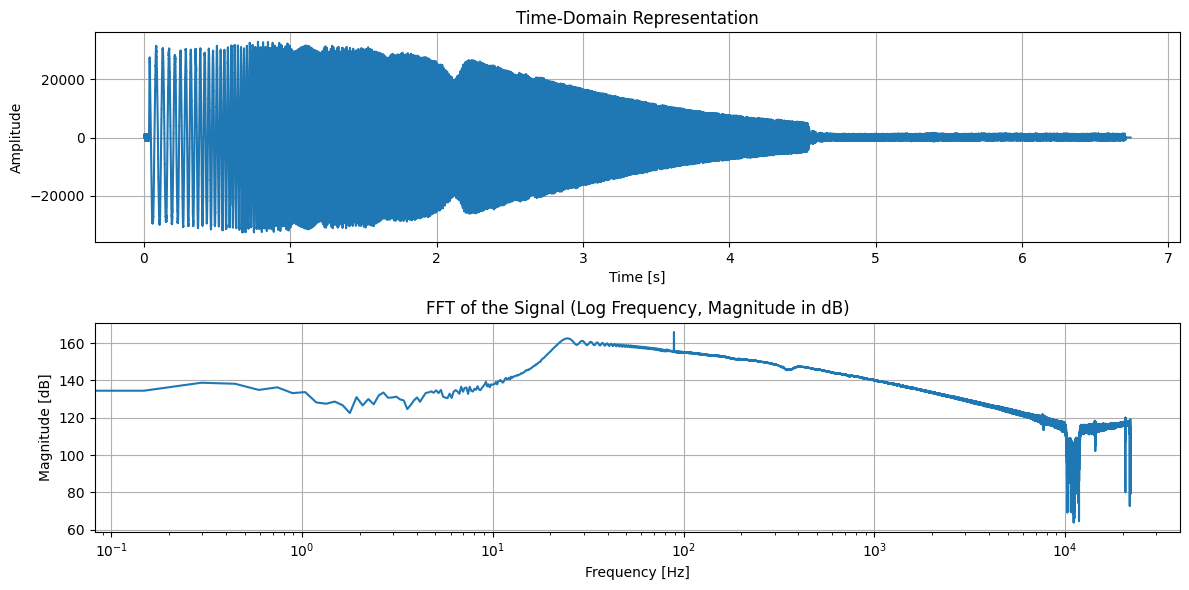

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read

def plot_response(filename):
    fs, signal = read(filename)
    fs_2, signal_2 = read('sweep_signal.wav')

    # if (fs == fs_2):
    #     print('Substracted sweep signal')
    #     if len(signal) > len(signal_2):
    #         signal_2 = np.pad(signal_2, (0, len(signal) - len(signal_2)), 'constant')
    #     elif len(signal) < len(signal_2):
    #         signal_2 = signal_2[:len(signal)]
    #     signal = signal - signal_2

    t = np.linspace(0, len(signal) / fs, num=len(signal))

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title('Time-Domain Representation')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()

    signal_fft = fft(signal)
    frequencies = fftfreq(len(signal), 1/fs)
    magnitude_db = 20 * np.log10(np.abs(signal_fft))

    plt.subplot(2, 1, 2)
    plt.plot(frequencies[:len(frequencies)//2], magnitude_db[:len(frequencies)//2])
    plt.xscale('log')
    plt.title('FFT of the Signal (Log Frequency, Magnitude in dB)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_response('sweep_signal.wav')
plot_response('transducer_response.wav')
plot_response('guitar_response.wav')